In [1]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout,Flatten,Input,Conv2D,BatchNormalization,GlobalAvgPool2D,MaxPooling2D

In [2]:
#load_data

fm=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fm.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


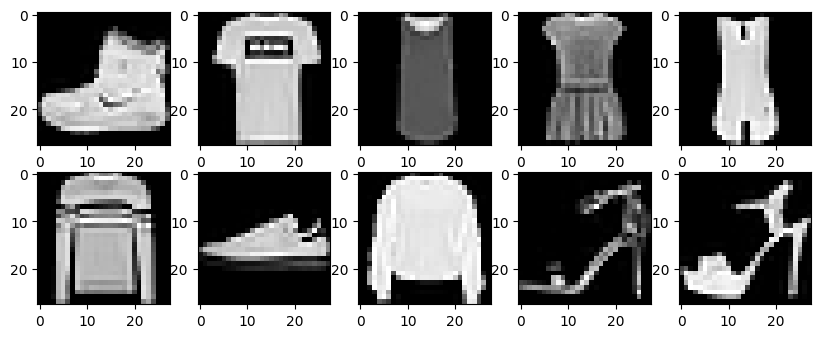

In [3]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [4]:
#normalize
x_train = train_images.reshape((60000,28,28,1)).astype('float32') / 255.0
x_test = test_images.reshape((10000,28,28,1)).astype('float32') / 255.0

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
model=Sequential([
    #Input(shape=(28,28)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    #layers.Flatten(),
    GlobalAvgPool2D(),

    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10,activation='softmax')])

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.fit(x_train, train_labels,epochs=30,batch_size=64,validation_split=0.1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6139 - loss: 1.1947 - val_accuracy: 0.8617 - val_loss: 0.3818
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8328 - loss: 0.4943 - val_accuracy: 0.8808 - val_loss: 0.3165
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8627 - loss: 0.4085 - val_accuracy: 0.8923 - val_loss: 0.3019
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8779 - loss: 0.3618 - val_accuracy: 0.8943 - val_loss: 0.2935
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8913 - loss: 0.3265 - val_accuracy: 0.9090 - val_loss: 0.2543
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9003 - loss: 0.2962 - val_accuracy: 0.8988 - val_loss: 0.2812
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9035 - loss: 0.2872 - val_accuracy: 0.9095 - val_loss: 0.2467
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9121 - loss: 0.2651 - val_accuracy: 

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │              

 Total params: 322,752 (1.23 MB)

 Trainable params: 107,370 (419.41 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 214,742 (838.84 KB)

In [21]:
print(model.evaluate(x_test,test_labels,verbose=2))

313/313 - 2s - 6ms/step - accuracy: 0.9180 - loss: 0.2917
[0.29165157675743103, 0.9179999828338623]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Confusion matrix, without normalization
[[273   1   5   6  62   2 636   0  14   1]
 [164 376   2 131  29   1 235   0  61   1]
 [ 53   0 137   0 410   0 383   0  16   1]
 [174   4   3 277 154   0 345   0  42   1]
 [  4   0   8   0 878   1 101   0   8   0]
 [ 30   1   0   0   1 875   3   0  64  26]
 [ 56   1   2   2 232   0 677   0  29   1]
 [ 92   9  20   5  47 328  49 254 130  66]
 [ 93   0   1   0  28   4  49   0 823   2]
 [105   2   2   0   9  28  25   4   8 817]]


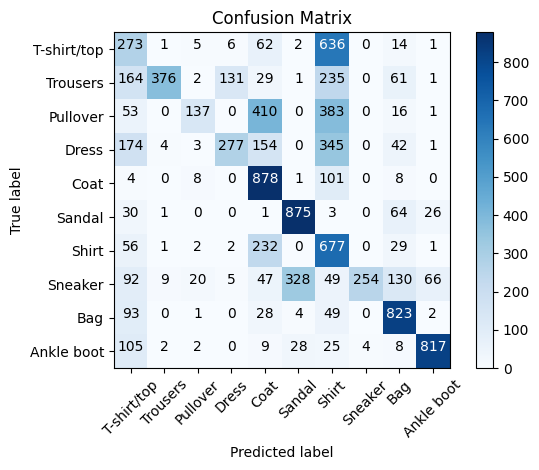

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# رسم ماتریس سردرگمی
conf_mtx = confusion_matrix(test_labels, predicted_classes)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

# تعریف کلاس‌ها
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plot_confusion_matrix(conf_mtx, classes=class_names, title='Confusion Matrix')

plt.show()